In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
import seaborn as sns
import json
from api_keys import weather_api_key

from datetime import datetime


In [2]:
city_data = pd.read_csv("Resources/cities.csv")

## Here's the thing:  
#### At this point, I should be turning the cities.csv file into an html file. And I do create html file later on. But this doesn't do justice to analysis. 
#### The dates should be updated. Max Temp is also the incorrect value to use.  So I'm pulling in a lot of code the PythonAPI homework, which this homework is based on.

In [3]:
# Let's create a base url for the openweathermap and check response for one city
base_url = "http://api.openweathermap.org/data/2.5/weather?"
mycity = "San Francisco"
units = "Imperial" #This will give you temperature in Fahrenheit

# Build query URL
query_url = base_url + "appid=" + weather_api_key + "&q=" + mycity + "&units=" + units

# Get weather data for my city
mycity_json = requests.get(query_url).json()
# Print the json (pretty printed)
print(json.dumps(mycity_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 37.77,
        "lon": -122.42
    },
    "dt": 1595737350,
    "id": 5391959,
    "main": {
        "feels_like": 51.21,
        "humidity": 77,
        "pressure": 1012,
        "temp": 58.06,
        "temp_max": 61,
        "temp_min": 55.99
    },
    "name": "San Francisco",
    "sys": {
        "country": "US",
        "id": 5817,
        "sunrise": 1595682467,
        "sunset": 1595733860,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 12.75
    }
}


In [8]:
cities = city_data["City"].to_list()
cities

['jacareacanga',
 'kaitangata',
 'goulburn',
 'lata',
 'chokurdakh',
 'martyush',
 'hobart',
 'broken hill',
 'harnosand',
 'tuatapere',
 'puerto ayora',
 'havre-saint-pierre',
 'punta arenas',
 'tasiilaq',
 'chapais',
 'avarua',
 'hofn',
 'yukamenskoye',
 'khandbari',
 'bethel',
 'ushuaia',
 'east london',
 'bluff',
 'mount isa',
 'pevek',
 'gao',
 'cabo san lucas',
 'sao filipe',
 'tiksi',
 'busselton',
 'alofi',
 'ola',
 'atar',
 'rikitea',
 'hermanus',
 'ponta delgada',
 'bambari',
 'cap malheureux',
 'puerto escondido',
 'qaanaaq',
 'new norfolk',
 'najran',
 'isla mujeres',
 'mar del plata',
 'provideniya',
 'jamestown',
 'medicine hat',
 'katsuura',
 'aklavik',
 'tuktoyaktuk',
 'kapaa',
 'mildura',
 'souillac',
 'lorengau',
 'praia',
 'port alfred',
 'barranca',
 'nome',
 'matay',
 'saskylakh',
 'itarema',
 'butaritari',
 'peniche',
 'beloha',
 'anadyr',
 'luderitz',
 'rochester',
 'bosaso',
 'faanui',
 'grindavik',
 'margate',
 'marsh harbour',
 'comodoro rivadavia',
 'upernavi

In [9]:
# Let's create empty lists to hold the responses from API calls
City = []
Country = []
Date = []
Latitude = []
Longitude = []
Humidity = []
Pressure = []
Temp= []
Max_Temp = []
Cloudiness = []
Wind_speed = []

# Display the start of Data Retrieval
print(f"****** Beginning Data Retrieval *********")

# Let's loop through each city in the cities list
for index, city in enumerate(cities):
    # Build query URL
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    # Get weather data for my city
    city_json = requests.get(query_url).json()
    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        City.append(city_json["name"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Latitude.append(city_json["coord"]["lat"])
        Longitude.append(city_json["coord"]["lon"])
        Humidity.append(city_json["main"]["humidity"])
        Pressure.append(city_json["main"]["pressure"])
        Temp.append(city_json["main"]["temp"])
        Max_Temp.append(city_json["main"]["temp_max"])
        Cloudiness.append(city_json["clouds"]["all"])
        Wind_speed.append(city_json["wind"]["speed"])
        print("Index : {}, City: {} found ! Collected weather data" .format(index, city))
        
    # Handle exceptions for cities that citipy cannot find
    except:
        # Append null values
        print("Index : {}, City: {} Not found ! Skipping.." .format(index, city))
        pass
print(f"****** Data Retrieval Complete **********")

210, City: jasper found ! Collected weather data
Index : 211, City: tempio pausania found ! Collected weather data
Index : 212, City: kununurra found ! Collected weather data
Index : 213, City: zhob found ! Collected weather data
Index : 214, City: los llanos de aridane found ! Collected weather data
Index : 215, City: nohar found ! Collected weather data
Index : 216, City: sainte-suzanne found ! Collected weather data
Index : 217, City: crotone found ! Collected weather data
Index : 218, City: gambela found ! Collected weather data
Index : 219, City: kavaratti found ! Collected weather data
Index : 220, City: ust-ilimsk found ! Collected weather data
Index : 221, City: leo found ! Collected weather data
Index : 222, City: totolapan found ! Collected weather data
Index : 223, City: funtua found ! Collected weather data
Index : 224, City: salalah found ! Collected weather data
Index : 225, City: burnie found ! Collected weather data
Index : 226, City: boulder city found ! Collected weat

In [17]:
from datetime import datetime
for index, dt in enumerate(Date):
    Date[index] = datetime.fromtimestamp(int(dt)).date()
Date


TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.date'

In [25]:
for index, dt in enumerate(Date):
    Date[index] = dt.strftime('%m-%d-%Y')
Date

['07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-2020',
 '07-25-20

In [26]:
# Let's create a dataframe with the responses obtained by the API
df_weather = pd.DataFrame({
    "City": City,
    "Country": Country,
    "Date": Date,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "Humidity": Humidity,
    "Pressure": Pressure,
    "Temp" : Temp,
    "Max_Temp": Max_Temp,
    "Cloudiness": Cloudiness,
    "Wind_Speed": Wind_speed    
    })
print("The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape))
df_weather.head(10)

The shape of the df_weather dataframe is: (547, 11)


,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Temp,Max_Temp,Cloudiness,Wind_Speed
0,Jacareacanga,BR,07-25-2020,-6.22,-57.75,60,1012,73.87,73.87,12,1.12
1,Kaitangata,NZ,07-25-2020,-46.28,169.85,59,1024,54.00,54.00,24,13.00
2,Goulburn,AU,07-25-2020,-34.75,149.72,96,1003,53.51,54.00,100,10.94
3,Lata,PT,07-25-2020,40.16,-8.33,92,1014,59.00,59.00,59,3.27
4,Chokurdakh,RU,07-25-2020,70.63,147.92,23,994,92.41,92.41,11,16.26
5,Martyush,RU,07-25-2020,56.40,61.88,77,1015,61.61,61.61,97,7.20
6,Hobart,AU,07-25-2020,-42.88,147.33,58,1021,55.26,57.99,20,5.82
7,Broken Hill,AU,07-25-2020,-31.95,141.43,39,1019,62.60,62.60,0,17.22
8,Härnösand,SE,07-25-2020,62.63,17.94,100,1010,49.50,55.00,2,3.36
9,Tuatapere,NZ,07-25-2020,-46.13,167.68,69,1026,52.95,52.95,21,6.22


In [28]:
city_html = pd.DataFrame.to_html(df_weather)
print(city_html)

472</th>
      <td>Ambilobe</td>
      <td>MG</td>
      <td>07-25-2020</td>
      <td>-13.20</td>
      <td>49.05</td>
      <td>49</td>
      <td>1017</td>
      <td>76.60</td>
      <td>76.60</td>
      <td>90</td>
      <td>7.92</td>
    </tr>
    <tr>
      <th>473</th>
      <td>Shebunino</td>
      <td>RU</td>
      <td>07-25-2020</td>
      <td>46.43</td>
      <td>141.86</td>
      <td>57</td>
      <td>1017</td>
      <td>68.00</td>
      <td>68.00</td>
      <td>23</td>
      <td>10.07</td>
    </tr>
    <tr>
      <th>474</th>
      <td>Broome</td>
      <td>US</td>
      <td>07-25-2020</td>
      <td>42.25</td>
      <td>-75.83</td>
      <td>73</td>
      <td>1020</td>
      <td>67.93</td>
      <td>71.01</td>
      <td>1</td>
      <td>0.85</td>
    </tr>
    <tr>
      <th>475</th>
      <td>Biedenkopf</td>
      <td>DE</td>
      <td>07-25-2020</td>
      <td>50.92</td>
      <td>8.53</td>
      <td>90</td>
      <td>1009</td>
      <td>60.66</td>
      <td>61.00</td>


In [30]:
city_html_to_text = open("Visualizations/city_data.html", "w", encoding="UTF-8")
city_html_to_text.write(city_html)
city_html_to_text.close()

In [34]:
#Let's create lists for the use of scattering!
Latitude = df_weather["Latitude"]
Temp = df_weather["Temp"]
Humidity = df_weather["Humidity"]
Wind_Speed = df_weather["Wind_Speed"]
Cloudiness = df_weather["Cloudiness"]

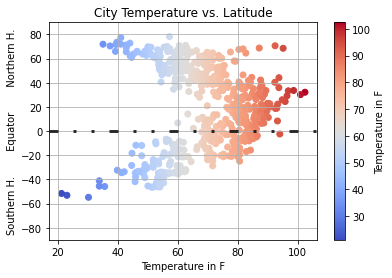

In [35]:
# Build a scatter plot of Temperature vs Latitude

plt.scatter(Temp, Latitude, c=Temp, cmap = "coolwarm")


# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Temperature vs. Latitude")
cbar = plt.colorbar()
cbar.set_label('Temperature in F')
plt.xlabel("Temperature in F")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"Visualizations/Lat_vs_Temp.png")


# Show plot
plt.show()

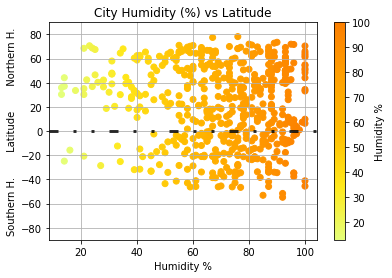

In [36]:
# Build a scatter plot for each data type
plt.scatter(Humidity, Latitude, c=Humidity, cmap = "Wistia")


# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Humidity (%) vs Latitude")
cbar = plt.colorbar()
cbar.set_label('Humidity %')
plt.xlabel("Humidity %")
plt.ylabel("Southern H.        Latitude        Northern H.")
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)
plt.grid(True)

# Save the figure
plt.savefig(f"Visualizations/Lat_vs_Humidity.png")

# Show plot
plt.show()

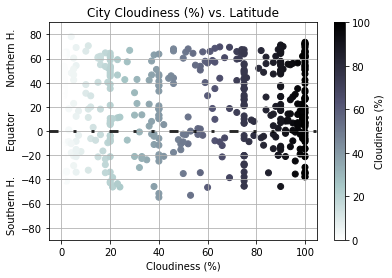

In [38]:
# Build a scatter plot for each data type

plt.scatter(Cloudiness, Latitude, c=Cloudiness, cmap="bone_r")

# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Cloudiness (%) vs. Latitude")
cbar = plt.colorbar()
cbar.set_label('Cloudiness (%)')
plt.xlabel("Cloudiness (%)")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"Visualizations/Lat_vs_Cloud.png")


# Show plotk
plt.show()

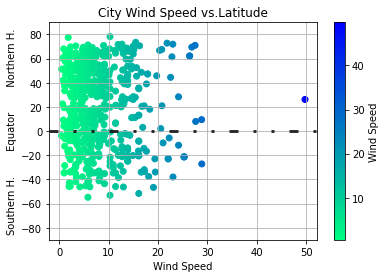

In [37]:
# Build a scatter plot for each data type

plt.scatter(Wind_Speed, Latitude, c=Wind_Speed, cmap="winter_r")    

# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Wind Speed vs.Latitude")
cbar = plt.colorbar()
cbar.set_label('Wind Speed')
plt.xlabel("Wind Speed")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"Visualizations/Lat_vs_WSpeed_.png")


# Show plot
plt.show()